

<font color='red' size='5'> Exercise 1: Implement Decision Tree Classifier (Zoo Dataset)</font>
1. Importing Required Libraries Let's first load the required libraries.
2. Loading Data: Let's first load the required dataset using pandas read CSV function.
3. Feature Selection: Here, you need to divide given columns into two types of variables
dependent (or target variable) and independent variable (or feature variables).
4. Splitting Data: To understand model performance, dividing the dataset into a training set
and a test set is a good strategy.
• Let's split the dataset by using function train_test_split(). You need to pass 3
parameters features, target, and test_set size.
5. Building Decision Tree Model: Let's create a Decision Tree Model using Scikit-learn.
6. Evaluating Model: Let's estimate, how accurately the classifier or model can predict the
different classes.
7. Accuracy can be computed by comparing actual test set values and predicted values.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
csv_filename="zoo.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names=["Animal", "Hair" , "Feathers" , "Eggs" , "Milk" , "Airborne",
                     "Aquatic" , "Predator" , "Toothed" , "Backbone", "Breathes" , "Venomous",
                     "Fins", "Legs", "Tail", "Domestic", "Catsize", "Type" ])

In [2]:
df

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.head(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
df.tail(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
93,vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
94,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


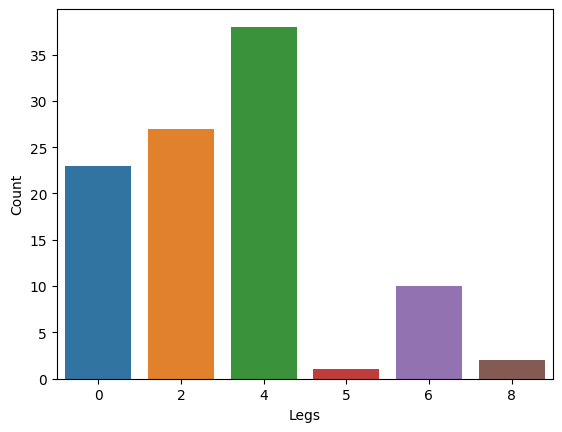

Legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

In [5]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(x="Legs", data=df)
plt.xlabel("Legs")
plt.ylabel("Count")
plt.show()
df.loc[:,'Legs'].value_counts()



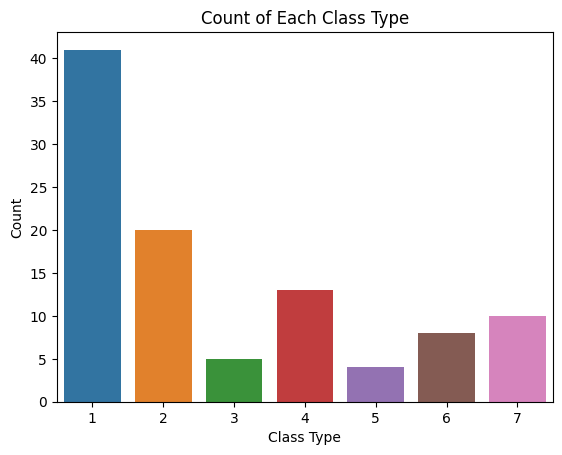

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Type', data=df)
plt.title("Count of Each Class Type")
plt.xlabel("Class Type")
plt.ylabel("Count")
plt.show()

In [7]:
df= df.drop('Animal',axis=1)

In [8]:
df.head()

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Type',axis=1)
Y= df['Type']

In [11]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: Type, Length: 101, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [14]:
len(X_train)

70

In [15]:
len(X_test)

31

In [16]:
X_train

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
11,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
30,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0


In [17]:
X_test

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
63,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [18]:
y_train

75    1
84    1
87    2
2     4
14    7
     ..
89    5
11    2
54    1
30    6
48    1
Name: Type, Length: 70, dtype: int64

In [19]:
y_test

16    2
6     1
91    3
83    2
4     1
63    1
77    7
67    1
27    1
45    1
92    4
15    7
53    7
76    3
60    4
24    6
90    3
55    1
17    1
70    1
61    4
22    1
49    1
79    2
59    2
93    1
95    2
50    1
13    7
29    1
31    1
Name: Type, dtype: int64

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [22]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [25]:
y_test

16    2
6     1
91    3
83    2
4     1
63    1
77    7
67    1
27    1
45    1
92    4
15    7
53    7
76    3
60    4
24    6
90    3
55    1
17    1
70    1
61    4
22    1
49    1
79    2
59    2
93    1
95    2
50    1
13    7
29    1
31    1
Name: Type, dtype: int64

In [23]:
y=model.predict(X_test)
y

array([2, 1, 5, 2, 1, 1, 7, 1, 1, 1, 4, 7, 7, 3, 4, 6, 7, 1, 1, 1, 4, 1,
       1, 2, 2, 1, 2, 1, 7, 1, 1], dtype=int64)

In [26]:
model.score(X_train, y_train)

1.0

In [27]:
model.score(X_test, y_test)

0.9354838709677419


<font color='red' size='5'> Confusion Matrix</font>

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  4]], dtype=int64)